Jacob Valdenegro Monzón A01640992

# Ejercicio 1

**Determina si es necesario balancear los datos.**

In [18]:
import numpy as np

# Cargar los datos desde el archivo
data = np.loadtxt('P1_2.txt')

y = data[:, 0]
X = data[:, 1:]

unicas, conteos = np.unique(y, return_counts=True)

for clase, conteo in zip(unicas, conteos):
    print(f'Clase {int(clase)}: {conteo} ejemplos')

total_ejemplos = len(y)
proporciones = conteos / total_ejemplos

for clase, proporcion in zip(unicas, proporciones):
    print(f'Clase {int(clase)}: {proporcion:.2%} del total')

max_proporcion = np.max(proporciones)
min_proporcion = np.min(proporciones)

Clase 1: 284 ejemplos
Clase 2: 1706 ejemplos
Clase 1: 14.27% del total
Clase 2: 85.73% del total


In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Cargar conjunto de datos
data = np.loadtxt("P1_2.txt")

x = data[:, 1:]
y = data[:, 0]

##### Precision con muestra balanceada (Upsampling) #####
print("----- Upsampling -----")

# Definir el clasificador
clf = SVC(kernel='linear')

# Configurar validacion cruzada estratificada
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Realizar upsampling
    ind = random.choices([i for i in range(n1)], k=n2)
    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Entrenar el clasificador
    clf.fit(x_sub, y_sub)

    # Fase de prueba
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Mostrar el informe de clasificacion
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.48      0.79      0.59       284
         2.0       0.96      0.86      0.91      1706

    accuracy                           0.85      1990
   macro avg       0.72      0.82      0.75      1990
weighted avg       0.89      0.85      0.86      1990



Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Cargar el conjunto de datos
data = np.loadtxt("P1_2.txt")
x = data[:, 1:]
y = data[:, 0]

# Lista de modelos a evaluar
models = {
    'SVC': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Validacion cruzada y evaluacion con muestra balanceada (Upsampling)
for model_name, model in models.items():
    print(f"----- {model_name} -----")
    
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    
    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        x1 = x_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)
        
        x2 = x_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)
        
        ind = random.choices([i for i in range(n1)], k=n2)
        
        x_sub = np.concatenate((x1[ind, :], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)
        
        model.fit(x_sub, y_sub)
        
        # Fase de prueba
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = model.predict(x_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



----- SVC -----
              precision    recall  f1-score   support

         1.0       0.48      0.80      0.60       284
         2.0       0.96      0.86      0.91      1706

    accuracy                           0.85      1990
   macro avg       0.72      0.83      0.75      1990
weighted avg       0.89      0.85      0.86      1990

----- Random Forest -----
              precision    recall  f1-score   support

         1.0       0.97      0.22      0.36       284
         2.0       0.88      1.00      0.94      1706

    accuracy                           0.89      1990
   macro avg       0.93      0.61      0.65      1990
weighted avg       0.90      0.89      0.86      1990

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.34      0.62      0.44       284
         2.0       0.93      0.80      0.86      1706

    accuracy                           0.78      1990
   macro avg       0.64      0.71      0.65      1990
weighted avg    

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

              precision    recall  f1-score   support

         1.0       0.53      0.67      0.59       284
         2.0       0.94      0.90      0.92      1706

    accuracy                           0.87      1990
   macro avg       0.74      0.79      0.76      1990
weighted avg       0.88      0.87      0.87      1990



Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos. 

In [16]:
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

class RegresionLogisticaDesdeCero:
    def __init__(self, tasa_aprendizaje=0.01, num_iteraciones=1000):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.num_iteraciones = num_iteraciones

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_muestras, num_caracteristicas = X.shape
        self.theta = np.zeros(num_caracteristicas)
        self.intercepto = 0

        for _ in range(self.num_iteraciones):
            modelo = np.dot(X, self.theta) + self.intercepto
            predicciones = self.sigmoid(modelo)

            # Calculo del gradiente
            errores = y - predicciones
            gradiente_theta = -np.dot(X.T, errores) / num_muestras
            gradiente_intercepto = -np.sum(errores) / num_muestras

            # Actualizacion de los parametros
            self.theta -= self.tasa_aprendizaje * gradiente_theta
            self.intercepto -= self.tasa_aprendizaje * gradiente_intercepto

    def predecir_prob(self, X):
        modelo = np.dot(X, self.theta) + self.intercepto
        return self.sigmoid(modelo)

    def predecir(self, X):
        probabilidades = self.predecir_prob(X)
        return np.where(probabilidades >= 0.5, 1, 2)  # Asumiendo clasificacion binaria

# Cargar conjunto de datos
data = np.loadtxt("P1_2.txt")

x = data[:, 1:]
y = data[:, 0]

# Precision con muestra balanceada (Upsampling) para Regresion Logistica
print("----- Regresion Logistica -----")

kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k=n2)

    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Entrenar el modelo
    clf = RegresionLogisticaDesdeCero(tasa_aprendizaje=0.01, num_iteraciones=1000)
    clf.fit(x_sub, y_sub)

    # Fase de prueba
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predecir(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Regresión Logística -----
              precision    recall  f1-score   support

         1.0       0.14      0.99      0.25       284
         2.0       0.84      0.01      0.02      1706

    accuracy                           0.15      1990
   macro avg       0.49      0.50      0.14      1990
weighted avg       0.74      0.15      0.06      1990



Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

In [27]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Cargar el conjunto de datos
data = np.loadtxt("P1_2.txt")
x = data[:, 1:]
y = data[:, 0]

# Definir funcion para realizar upsampling y evaluar el modelo
def evaluate_model(x_train, y_train, x_test, y_test, k_features):
    # Aplicar upsampling
    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k=n2)

    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Seleccion de caracteristicas
    selector = SelectKBest(f_classif, k=k_features)
    x_sub_selected = selector.fit_transform(x_sub, y_sub)
    x_test_selected = selector.transform(x_test)

    # Entrenamiento del modelo
    clf = SVC(kernel='linear')
    clf.fit(x_sub_selected, y_sub)

    # Fase de prueba
    y_pred = clf.predict(x_test_selected)

    return classification_report(y_test, y_pred, output_dict=True)

# Definir parametros
kf = StratifiedKFold(n_splits=5, shuffle=True)
k_features_range = range(1, x.shape[1] + 1)
results = {}

# Realizar validacion cruzada y seleccion de caracteristicas
for k_features in k_features_range:
    fold_reports = []
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index, :], x[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        report = evaluate_model(x_train, y_train, x_test, y_test, k_features)
        fold_reports.append(report['accuracy'])

    # Calcular la precision media para el numero actual de caracteristicas
    average_accuracy = np.mean(fold_reports)
    results[k_features] = average_accuracy

# Imprimir resultados
for k_features, accuracy in results.items():
    print(f"Numero de caracteristicas: {k_features}, Precision Media: {accuracy:.4f}")

# Determinar el numero optimo de caracteristicas
optimal_k = max(results, key=results.get)
print(f"Numero optimo de caracteristicas: {optimal_k} con precision {results[optimal_k]:.4f}")


Número de características: 1, Precisión Media: 0.6146
Número de características: 2, Precisión Media: 0.6558
Número de características: 3, Precisión Media: 0.6854
Número de características: 4, Precisión Media: 0.7045
Número de características: 5, Precisión Media: 0.7141
Número de características: 6, Precisión Media: 0.7332
Número de características: 7, Precisión Media: 0.7548
Número de características: 8, Precisión Media: 0.7618
Número de características: 9, Precisión Media: 0.7824
Número de características: 10, Precisión Media: 0.7714
Número de características: 11, Precisión Media: 0.8030
Número de características: 12, Precisión Media: 0.7834
Número de características: 13, Precisión Media: 0.7925
Número de características: 14, Precisión Media: 0.8055
Número de características: 15, Precisión Media: 0.8116
Número de características: 16, Precisión Media: 0.8075
Número de características: 17, Precisión Media: 0.8196
Número de características: 18, Precisión Media: 0.8186
Número de caracterí

Repite el paso anterior, pero para un método de selección de características secuencial.


In [ ]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Cargar el conjunto de datos
data = np.loadtxt("P1_2.txt")
x = data[:, 1:]
y = data[:, 0]

# Definir funcion para realizar upsampling y evaluar el modelo
def evaluate_model(x_train, y_train, x_test, y_test, n_features):
    # Aplicar upsampling
    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k=n2)

    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Seleccion secuencial de características
    selector = SequentialFeatureSelector(SVC(kernel='linear'), n_features_to_select=n_features, direction='forward')
    x_sub_selected = selector.fit_transform(x_sub, y_sub)
    x_test_selected = selector.transform(x_test)

    # Entrenamiento del modelo
    clf = SVC(kernel='linear')
    clf.fit(x_sub_selected, y_sub)

    # Fase de prueba
    y_pred = clf.predict(x_test_selected)

    return classification_report(y_test, y_pred, output_dict=True)

# Definir parametros
kf = StratifiedKFold(n_splits=5, shuffle=True)
n_features_range = range(1, x.shape[1] + 1)
results = {}

# Realizar validacion cruzada y seleccion de caracteristicas secuencial
for n_features in n_features_range:
    fold_reports = []
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index, :], x[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        report = evaluate_model(x_train, y_train, x_test, y_test, n_features)
        fold_reports.append(report['accuracy'])

    # Calcular la precision media para el numero actual de caracteristicas
    average_accuracy = np.mean(fold_reports)
    results[n_features] = average_accuracy

# Imprimir resultados
for n_features, accuracy in results.items():
    print(f"Numero de caracteristicas: {n_features}, Precision Media: {accuracy:.4f}")

# Determinar el numero optimo de caracteristicas
optimal_n = max(results, key=results.get)
print(f"Número optimo de caracteristicas: {optimal_n} con precision {results[optimal_n]:.4f}")


Tardo mas de 2 horas y media

Repite el paso 4, pero para un método de selección de características recursivo.

In [ ]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Cargar conjunto de datos
data = np.loadtxt("P1_2.txt")
x = data[:, 1:]
y = data[:, 0]

# Definir funcion para realizar upsampling y evaluar el modelo
def evaluate_model(x_train, y_train, x_test, y_test, n_features):
    # Aplicar upsampling
    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k=n2)

    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Seleccion de caracteristicas con RFE
    clf = SVC(kernel='linear')
    selector = RFE(clf, n_features_to_select=n_features, step=1)
    x_sub_selected = selector.fit_transform(x_sub, y_sub)
    x_test_selected = selector.transform(x_test)

    # Entrenamiento del modelo
    clf.fit(x_sub_selected, y_sub)

    # Fase de prueba
    y_pred = clf.predict(x_test_selected)

    return classification_report(y_test, y_pred, output_dict=True)

# Definir parametros
kf = StratifiedKFold(n_splits=5, shuffle=True)
n_features_range = range(1, x.shape[1] + 1)
results = {}

# Realizar validacion cruzada y seleccion de caracteristicas
for n_features in n_features_range:
    fold_reports = []
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index, :], x[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        report = evaluate_model(x_train, y_train, x_test, y_test, n_features)
        fold_reports.append(report['accuracy'])

    # Calcular la precision promedio para el numero actual de caracteristicas
    average_accuracy = np.mean(fold_reports)
    results[n_features] = average_accuracy

# Imprimir resultados
for n_features, accuracy in results.items():
    print(f"Numero de caracteristicas: {n_features}, Precision promedio: {accuracy:.4f}")

# Determinar el numero optimo de caracteristicas
optimal_n = max(results, key=results.get)
print(f"Numero optimo de caracteristicas: {optimal_n} con precision {results[optimal_n]:.4f}")


Tardo mas de 2 horas y media

Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:


In [33]:
# Seleccionar el numero optimo de caracteristicas
k_optimal = 120

# Aplicar seleccion de caracteristicas en todo el conjunto de datos
selector = SelectKBest(f_classif, k=k_optimal)
x_selected = selector.fit_transform(x, y)

# Ajustar el modelo con todas las caracteristicas seleccionadas
clf_final = SVC(kernel='linear')
clf_final.fit(x_selected, y)

print(f"Modelo final ajustado con las {k_optimal} características mas relevantes.")


Modelo final ajustado con las 120 características más relevantes.


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=120 is greater than n_features=10. All the features will be returned.
  warnings.warn(


**¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

El modelo puede mostrar una alta precisión global simplemente porque predice mayoritariamente la clase mayoritaria.

**De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

SVC, Gradient Boosting, y AdaBoost parecen ser los más prometedores debido a su capacidad para manejar el desbalanceo y ofrecer un rendimiento aceptable.

**¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo?**

Puede ser posble si se eliminan las caracteristicas relevantes.

**¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

El que use fue el filter ya que es rapido y facil de implementar y tambien ayuda a reducir la tamaño seleccionando las caracteristicas mas relevantes. puede que otros metodos sean mas precisos pero son mas costosos computacionalmente.

**Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

Ajustar con hiperparametros, balancear los datos con otras tecnicas como SMOTE o combinar modelos.

# Ejercicio 2

Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


In [10]:
import numpy as np
import collections

# Cargar los datos, ignorando la segunda columna
datos = np.loadtxt('M_5.txt', delimiter='\t', usecols=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Contar las instancias por clase
clases = datos[:, 0]  # Primera columna son las clases
conteo_clases = collections.Counter(clases)

# Mostrar la distribucion de clases
print("Distribucion de clases:")
for clase, conteo in conteo_clases.items():
    print(f"Clase {clase}: {conteo} instancias")

# Evaluar si es necesario balancear
# Por ejemplo, si una clase tiene menos del 10% de las instancias totales, podria considerarse desbalanceada
total_instancias = sum(conteo_clases.values())
umbral = 0.10 * total_instancias

clases_desbalanceadas = [clase for clase, conteo in conteo_clases.items() if conteo < umbral]

if clases_desbalanceadas:
    print(f"Clases desbalanceadas: {clases_desbalanceadas}. Se recomienda balancear los datos.")
else:
    print("Los datos estan balanceados.")


Distribución de clases:
Clase 1.0: 90 instancias
Clase 2.0: 90 instancias
Clase 3.0: 90 instancias
Clase 4.0: 90 instancias
Clase 5.0: 90 instancias
Clase 6.0: 90 instancias
Clase 7.0: 89 instancias
Los datos están balanceados.


Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Cargar el conjunto de datos
data = np.loadtxt('M_5.txt', delimiter='\t', usecols=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
x = data[:, 1:]
y = data[:, 0]

# Lista de modelos a evaluar
models = {
    'SVC': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Validacion cruzada y evaluacion de modelos
for model_name, model in models.items():
    print(f"----- {model_name} -----")
    
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    
    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train, y_train = x[train_index], y[train_index]
        
        # Entrenar el modelo
        model.fit(x_train, y_train)
        
        # Fase de prueba
        x_test, y_test = x[test_index], y[test_index]
        y_pred = model.predict(x_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    
    # Imprimir el reporte de clasificacion
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- SVC -----
              precision    recall  f1-score   support

         1.0       0.77      0.71      0.74        90
         2.0       0.51      0.49      0.50        90
         3.0       0.98      0.94      0.96        90
         4.0       0.86      0.83      0.85        90
         5.0       0.64      0.66      0.65        90
         6.0       0.58      0.67      0.62        90
         7.0       0.98      1.00      0.99        89

    accuracy                           0.76       629
   macro avg       0.76      0.76      0.76       629
weighted avg       0.76      0.76      0.76       629

----- Random Forest -----
              precision    recall  f1-score   support

         1.0       0.71      0.67      0.69        90
         2.0       0.47      0.50      0.48        90
         3.0       0.93      0.93      0.93        90
         4.0       0.83      0.79      0.81        90
         5.0       0.63      0.67      0.65        90
         6.0       0.56      0.54   

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

         1.0       0.69      0.67      0.68        90
         2.0       0.49      0.49      0.49        90
         3.0       0.94      0.93      0.94        90
         4.0       0.81      0.76      0.78        90
         5.0       0.60      0.64      0.62        90
         6.0       0.50      0.53      0.52        90
         7.0       0.98      0.96      0.97        89

    accuracy                           0.71       629
   macro avg       0.72      0.71      0.71       629
weighted avg       0.72      0.71      0.71       629

----- AdaBoost -----


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

              precision    recall  f1-score   support

         1.0       0.21      0.39      0.28        90
         2.0       0.30      0.08      0.12        90
         3.0       0.94      0.74      0.83        90
         4.0       0.64      0.42      0.51        90
         5.0       0.33      0.73      0.45        90
         6.0       0.46      0.57      0.50        90
         7.0       0.00      0.00      0.00        89

    accuracy                           0.42       629
   macro avg       0.41      0.42      0.39       629
weighted avg       0.41      0.42      0.39       629



c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jacob\AppData\

Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.


----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.6853206349206349
---- k = 2
ACC: 0.6566730158730157
---- k = 3
ACC: 0.7075555555555557
---- k = 4
ACC: 0.710615873015873
---- k = 5
ACC: 0.7123301587301587
---- k = 6
ACC: 0.7090285714285715
---- k = 7
ACC: 0.7170666666666667
---- k = 8
ACC: 0.7138412698412699
---- k = 9
ACC: 0.7186412698412699
---- k = 10
ACC: 0.7233777777777778
---- k = 11
ACC: 0.7138539682539683
---- k = 12
ACC: 0.7313396825396825
---- k = 13
ACC: 0.732952380952381
---- k = 14
ACC: 0.7234158730158731
---- k = 15
ACC: 0.7138920634920634
---- k = 16
ACC: 0.7202158730158731
---- k = 17
ACC: 0.7107047619047618
---- k = 18
ACC: 0.7154539682539683
---- k = 19
ACC: 0.7106920634920634
---- k = 20
ACC: 0.7043174603174602
---- k = 21
ACC: 0.7027301587301586
---- k = 22
ACC: 0.7090920634920634
---- k = 23
ACC: 0.7107047619047618
---- k = 24
ACC: 0.7059174603174603
---- k = 25
ACC: 0.7170539682539683
---- k = 26
ACC: 0.7154539682539683
---- k = 27
ACC: 0.715466666666666

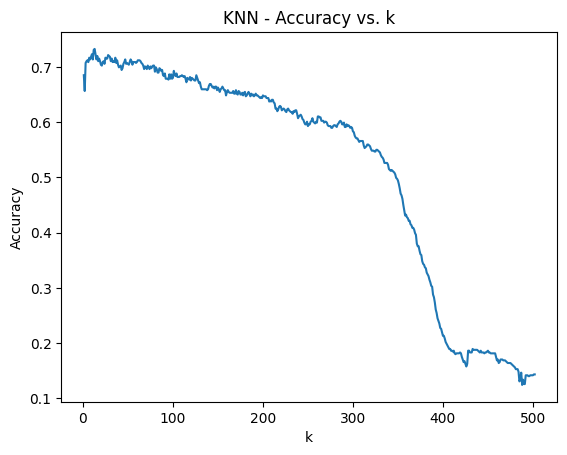

----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.6057904761904763
---- C = 0.0010974987654930556
ACC: 0.6042158730158731
---- C = 0.0012045035402587824
ACC: 0.618552380952381
---- C = 0.0013219411484660286
ACC: 0.620152380952381
---- C = 0.0014508287784959402
ACC: 0.6217396825396826
---- C = 0.0015922827933410922
ACC: 0.6249396825396826
---- C = 0.001747528400007683
ACC: 0.6265142857142857
---- C = 0.0019179102616724887
ACC: 0.6313015873015873
---- C = 0.00210490414451202
ACC: 0.6408380952380952
---- C = 0.0023101297000831605
ACC: 0.6456
---- C = 0.0025353644939701114
ACC: 0.6535492063492063
---- C = 0.0027825594022071257
ACC: 0.6519238095238095
---- C = 0.0030538555088334154
ACC: 0.6550730158730158
---- C = 0.003351602650938841
ACC: 0.6598349206349207
---- C = 0.0036783797718286343
ACC: 0.669384126984127
---- C = 0.004037017258596553
ACC: 0.6757460317460318
---- C = 0.004430621457583882
ACC: 0.680495238095238
---- C = 0.004862601580065354
ACC: 0.678907936507

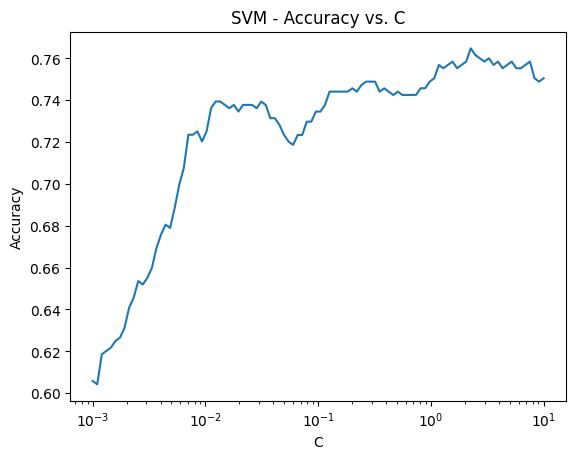

SVC(C=np.float64(2.2570197196339215), kernel='linear')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Cargar el conjunto de datos
data = np.loadtxt('M_5.txt', delimiter='\t', usecols=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Verificar y limpiar los datos
x = data[:, 1:]
y = data[:, 0]

# Reemplazar NaN con valores especificos
x = np.nan_to_num(x, nan=np.nanmean(x), posinf=np.nanmean(x), neginf=np.nanmean(x))

#------------------------------------------------------------------------------------------------------------------
# KNN classifier - Seleccion del parametro K
#------------------------------------------------------------------------------------------------------------------

print("----- KNN classifier - K parameter -----")

kk = np.arange(1, 503)
acc = []

for k in kk:
    print('---- k =', k)
    
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x, y):
        # Entrenamiento
        x_train, y_train = x[train_index], y[train_index]     
        clf_cv = KNeighborsClassifier(n_neighbors=k)
        clf_cv.fit(x_train, y_train)

        # Prueba
        x_test, y_test = x[test_index], y[test_index]
        y_pred = clf_cv.predict(x_test)    
        acc_cv.append(accuracy_score(y_test, y_pred))

    acc_hyp = np.mean(acc_cv)
    acc.append(acc_hyp)
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = kk[opt_index]
best_k = opt_hyperparameter
print("Optimal k: ", best_k)

plt.plot(kk, acc)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN - Accuracy vs. k")
plt.show()

# Entrenar el modelo con el parametro optimo
clf_knn = KNeighborsClassifier(n_neighbors=opt_hyperparameter)
clf_knn.fit(x, y)

#------------------------------------------------------------------------------------------------------------------
# SVM classifier - Seleccion del parametro C
#------------------------------------------------------------------------------------------------------------------

print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)
acc = []

for c in cc:
    print('---- C =', c)
    
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x, y):
        # Entrenamiento
        x_train, y_train = x[train_index], y[train_index]
        clf_cv = SVC(C=c, kernel='linear')
        clf_cv.fit(x_train, y_train)

        # Prueba
        x_test, y_test = x[test_index], y[test_index]
        y_pred = clf_cv.predict(x_test)    
        acc_cv.append(accuracy_score(y_test, y_pred))

    acc_hyp = np.mean(acc_cv)
    acc.append(acc_hyp)
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
best_C = opt_hyperparameter
print("Optimal C: ", best_C)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM - Accuracy vs. C")
plt.show()

# Entrenar el modelo con el parametro optimo
clf_svm = SVC(C=opt_hyperparameter, kernel='linear')
clf_svm.fit(x, y)

#------------------------------------------------------------------------------------------------------------------
# Fin del archivo
#------------------------------------------------------------------------------------------------------------------


Prepara tus modelos para producción haciendo lo siguiente:


In [9]:
# Ajustar el modelo KNN con todos los datos
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x, y)

# Ajustar el modelo SVM con todos los datos
final_svm = SVC(C=best_C, kernel='linear')
final_svm.fit(x, y)

print("----- Modelos ajustados con todos los datos -----")
print("KNN Model:", final_knn)
print("SVM Model:", final_svm)


----- Modelos ajustados con todos los datos -----
KNN Model: KNeighborsClassifier(n_neighbors=np.int64(13))
SVM Model: SVC(C=np.float64(2.2570197196339215), kernel='linear')


In [15]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo KNN con validacion cruzada
knn_scores = cross_val_score(final_knn, x, y, cv=5, scoring='accuracy')
print("----- Evaluacion del Modelo KNN -----")
print(f"Precision media con validacion cruzada (KNN): {knn_scores.mean()}")
print(f"Desviacion estandar de la precision (KNN): {knn_scores.std()}")

# Evaluar el modelo SVM con validacion cruzada
svm_scores = cross_val_score(final_svm, x, y, cv=5, scoring='accuracy')
print("----- Evaluacion del Modelo SVM -----")
print(f"Precision media con validacion cruzada (SVM): {svm_scores.mean()}")
print(f"Desviacion estandar de la precision (SVM): {svm_scores.std()}")


----- Evaluación del Modelo KNN -----
Precisión media con validación cruzada (KNN): 0.7248761904761906
Desviación estándar de la precisión (KNN): 0.039120538958520724
----- Evaluación del Modelo SVM -----
Precisión media con validación cruzada (SVM): 0.7440126984126983
Desviación estándar de la precisión (SVM): 0.022957887328257605


**¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

No porque todas las clases tienen una cantidad igual de instancias, a excepcion de la ultima que es de 1 menos, pero no es necesario aplicar un balanceo.

**¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

SVM y KNN fueron efectivos y los que decidi utilizar. El SVM por ejemplo tiende a manejar bien los datos con multiples clases.

**¿Observas alguna mejora importante al optimizar hiperparámetros?**

El KNN si mejoro un poco al optimizar el valor de K, pero el SVM no mejoro mucho ya que inicialmente ya tenia un buen rendimiento

**¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**

Puede ser costoso computacionalmente y tardar algo de tiempo, y no en todos los casos mejora mucho como para que valga la pena encontrarlos.